Andrea Giraldo-Puerta #programming Assig. 1

## Question1 
Write a function trace1D() that finds the trace of a matrix given by a one dimensional NumPy array. You can not use the built-in function np.trace() or any other builtin function in any way. 

Display the output of the following
print(“Trace of the suggested matrix is: {}”.format(trace1D(np.arange(0,100,1))))

In [295]:
# import statements
import numpy as np
import math
import sys

# Write your function here
def trace1D(mat1D):
    array_len = mat1D.shape[0]
    print("You have provided an array of length ",array_len)
    n = math.ceil (math.sqrt(array_len))
    
    # Check if you have a sufficient number of elements to form a square matrix
    if n > math.sqrt(array_len):
        # sys.exit(message) raises an exception too
        print("Please provide sufficient number of elements for a square matrix. System exit.")
        sys.exit()
    
    # Sum of the elements that will appear in the diagonal to give the trace
    sum = 0.0
    for k in range(n):
        sum  = mat1D[k*n+1]# Your code comes here.
    return sum
    

In [296]:
# Show the output of the following
print("Trace of the suggested matrix is: {}".format(trace1D(np.arange(0,100,1))))

You have provided an array of length  100
Trace of the suggested matrix is: 91


## Question 2

Read an appropriate RGB-image of your choice in a 3-D Tensor named myRGB. 

Perform the following operations on this tensor: 

(A) Pad the image by 50 pixels on all sides. This operation is akin to putting a dark frame around the image. Display this RGB image.

Success! Just finished reading an image  into a tensor of order (2048, 1154, 3) 



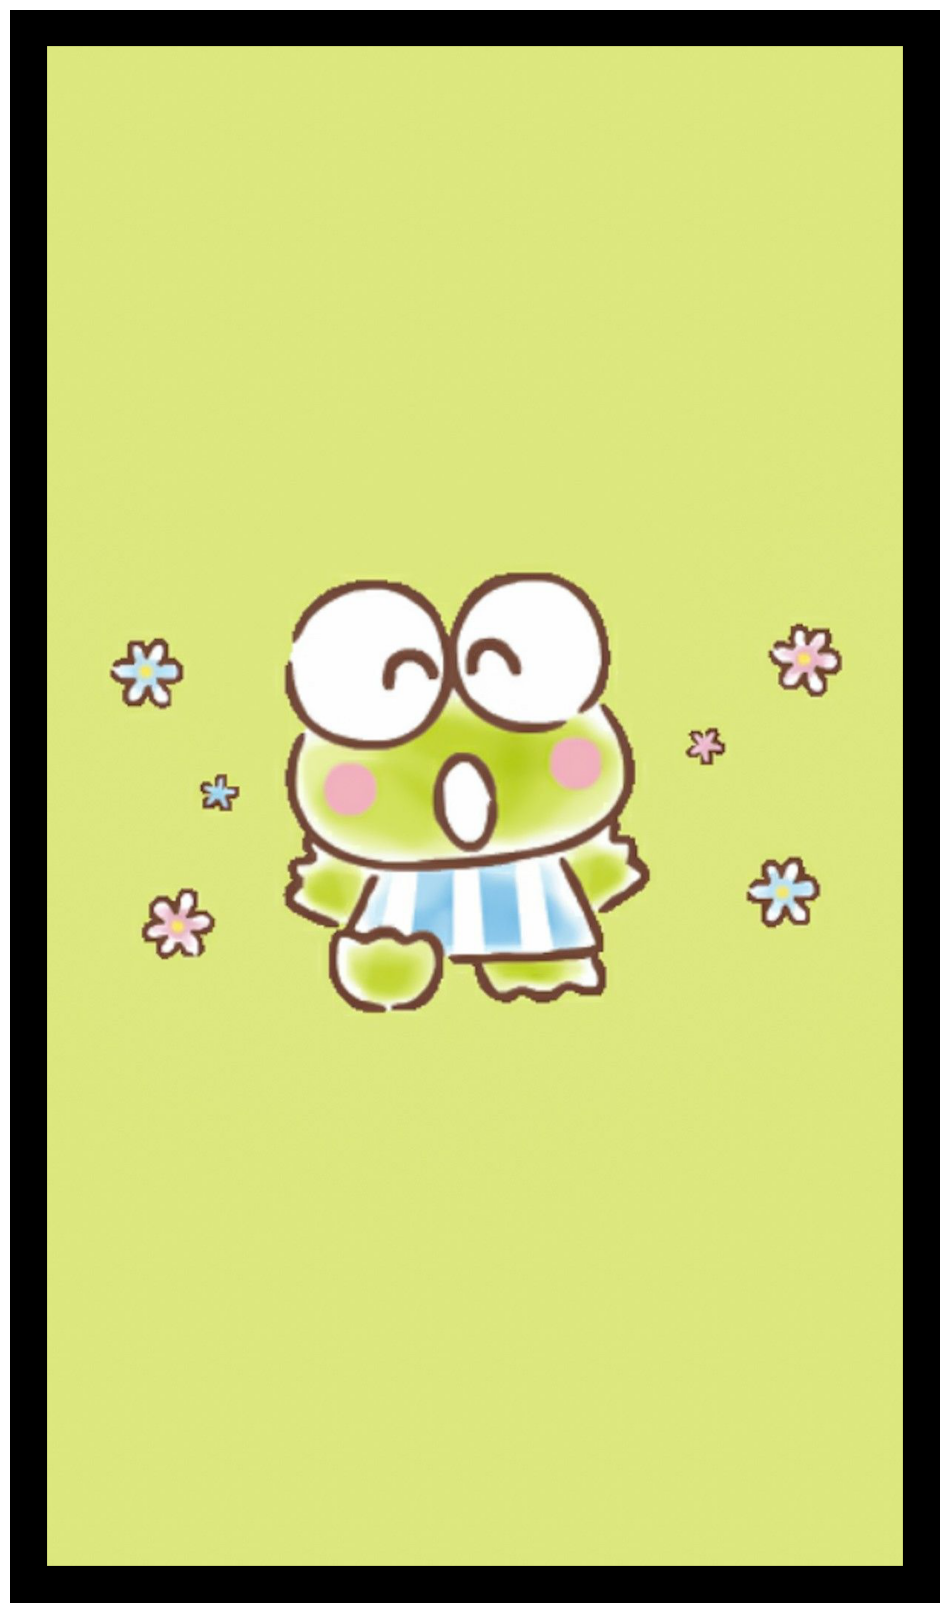

In [6]:
# Follow the example from class. Modify it to the case of color images.
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def display_image(arr_image,color_map=None,dim=(10,20)):
        arr_image = (arr_image - np.min(arr_image))/(np.max(arr_image) - np.min(arr_image))
        arr_image = np.uint8(arr_image*255)
        plt.figure(figsize=dim)
        plt.axis('off')
        plt.imshow(arr_image, cmap=color_map)
        plt.show()
    
myRGB = mpimg.imread("profile.jpg")
print("Success! Just finished reading an image  into a tensor of order", myRGB.shape, "\n")

paddle_image = np.pad(myRGB, ((50,50), (50,50), (0,0)), mode='constant', constant_values=0)
display_image(paddle_image,dim=(12,24))


(B) Use a sliding window of a 3x3 matrix, K (referred to as a kernel), to perform an operation called convolution on the original image. Display some of these images after convolution. 

Note that you only need to use appropriate slicing of the source image, element wise product, and np.sum in loops to perform this. 

Display the images after convolutions using K=[1 0 -1;0 0 0;-1 0 1] and K = [0 -1 0; -1 4 -1; 0 -1 0]. Describe what these convolutions have achieved. 

To know more about convolution and how to achieve it, read Section 9.2 in https://www.deeplearningbook.org/contents/convnets.html.

Here is another resource on convolution: https://developer.apple.com/library/archive/documentation/Performance/Conceptual/vImage/ConvolutionOperations/ConvolutionOperations.html

Convolution with kernel K1


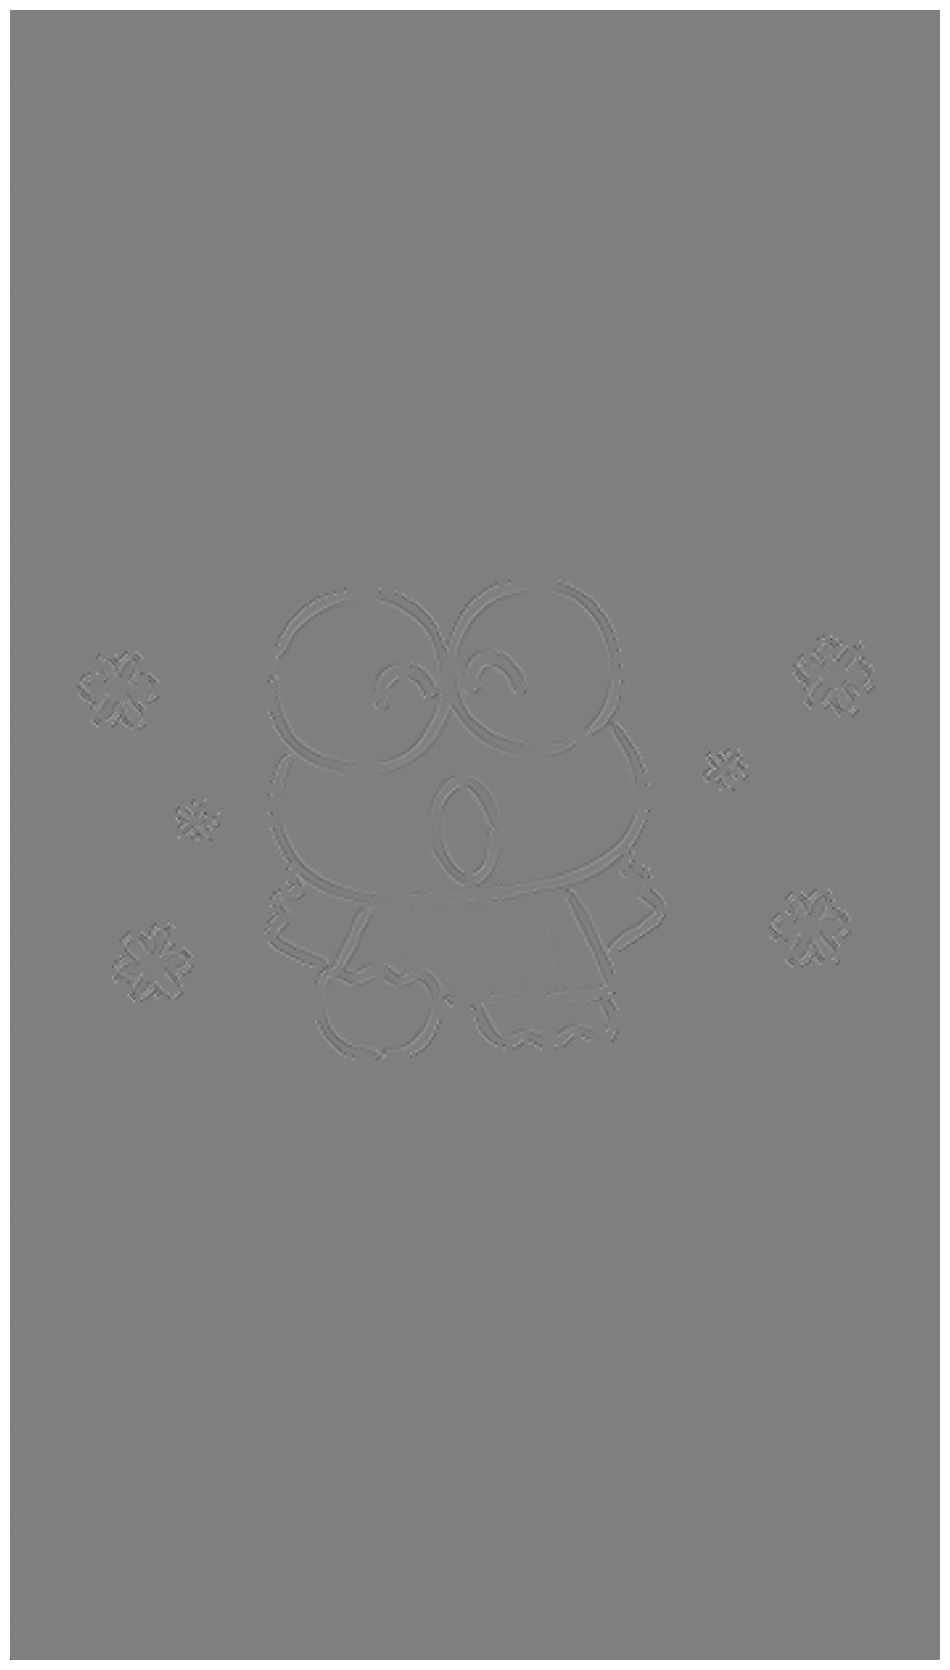

Convolution with kernel K2


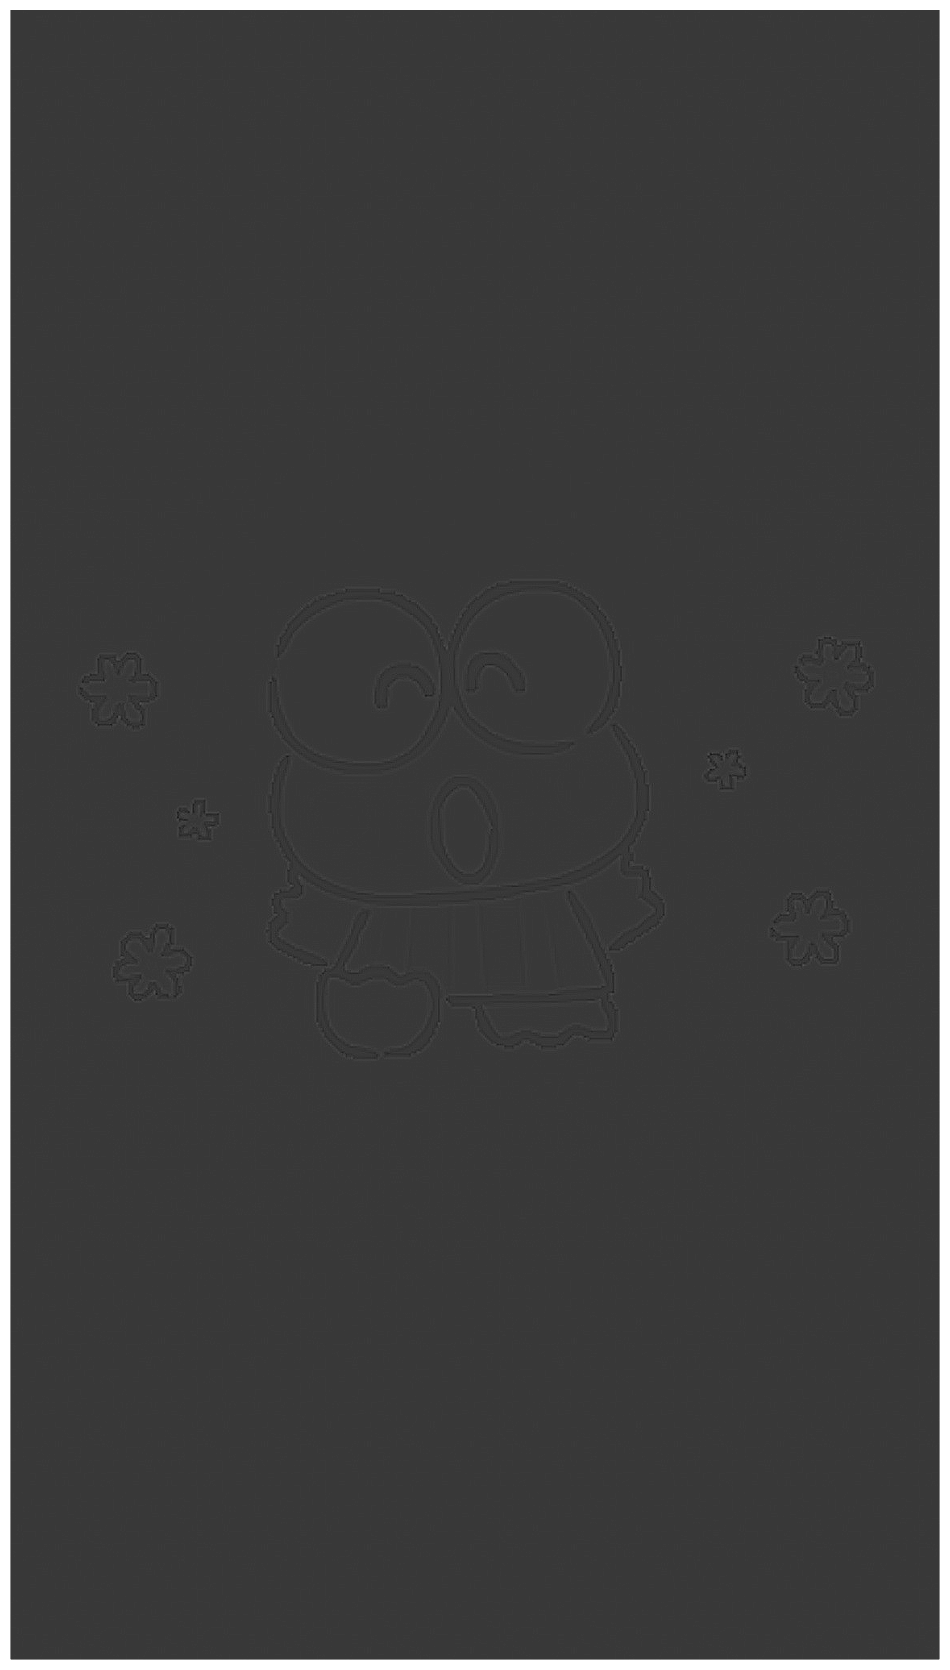

In [312]:
def RGB_to_gray(image):
    return np.dot(image[..., :3],[0.2989, 0.5870, 0.1140])

# Work with a B&W image from the colorimage myRGB.
myGray = RGB_to_gray(myRGB) # Code to convert to a B&W image
# Create a padded B&W image from myRGB by padding one pixel on all sides. Why?
myGray_padded =  np.pad(myGray, ((1,1),(1,1)), mode='constant', constant_values=0) # Do it on myGray a B&W image

# If the convoluted image is named myGray_conv, initialize it.
myGray_conv = np.zeros_like(myGray)

# Python code for convolution that needs modification by you.
K1 = np.array([[1,0,-1],[0,0,0],[-1,0,1]])
K2 = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])# Take appropriate Kernel

def convolve2d(image, K):
    m,n= image.shape # Find dimension of the image
    conv_image=np.zeros((m-2, n-2))
    for i in range(1, m-1):
        for j in range(1, n-1):
            # Take appropriate slice of myRGB_padded to get a (3x3) window on the image
            myGray_window = image[i-1:i+2, j-1:j+2] # Your code here
            # CODE for finding the i,j-th pixel on the convoluted image
            conv_image[i-1,j-1] = np.sum(myGray_window * K)
            
    return conv_image
    
conv_image_K1= convolve2d(myGray_padded, K1)
conv_image_K2= convolve2d(myGray_padded, K2)

# Display the convoluted image
print("Convolution with kernel K1")
display_image(conv_image_K1, color_map='gray', dim=(12,24))

print("Convolution with kernel K2")
display_image(conv_image_K2, color_map='gray', dim=(12,24))

What did I observe? I observed that K1 has less contrast than K2. In K1, you can see the vertical lines in the figure are more highlighted since the kernel is focusing more only on the vertical edges. Meanwhile, K2 has a higher contrast, and because the light is pixel resolution is higher across the whole image since all the edges in all directions are being detected. 